In [1]:
%pylab inline
import os
import sys
sys.path.insert(0, os.getenv("HOME") + '/src/syntist')
from utils import ImagePlotter
from flyem_syn_eval import eval as flyem_eval

IP = ImagePlotter()

Populating the interactive namespace from numpy and matplotlib


RUN 32, CX, iteration = 40'000
key aspects: check if overfitting possible, with reweighting; higher learning rate(le=1e-6); same network as before (fmap=24/3) 
Training settings:
    SOLVER:
        learning rate = 1e-6
    NETWORK:
        features maps to start: 24
        factor = 3
        depth: 3
    DATA:
        trained on cx1_2_small
    LOSS:
        euclid
    REMARKS:
        - ExclusiveZone around landmarks
        - reweighting

In [2]:
# run 29
cx1_2_small_29_json_filename = os.path.join(os.getenv("HOME")+'/projects/syntist/processing', '20170702', '203404',
                             '400000','cx1_2_small_syn_locations_sigma2_minpeakdist10.json')
cx1_2_small_29_results = flyem_eval.evaluate_pr(flyem_eval.Tbar_Info(cx1_2_small_29_json_filename),
                                                 flyem_eval.cx_synapse_groundtruth('2_small'),
                                                 conf_thresholds=np.arange(0.00,0.98,0.02))

In [3]:
# run 31
cx1_2_small_31_json_filename = os.path.join(os.getenv("HOME")+'/projects/syntist/processing', '20170704', '131815',
                               '300000','cx1_2_small_syn_locations_sigma2_minpeakdist10.json')
cx1_2_small_31_results = flyem_eval.evaluate_pr(flyem_eval.Tbar_Info(cx1_2_small_31_json_filename),
                                                 flyem_eval.cx_synapse_groundtruth('2_small'),
                                                 conf_thresholds=np.arange(0.00,0.98,0.02))

In [4]:
# run 32
cx1_2_small_32_json_filename = os.path.join(os.getenv("HOME")+'/projects/syntist/processing', '20170707', '215138',
                               '60000','cx1_2_small_syn_locations_sigma2_minpeakdist10.json')
cx1_2_small_32_results = flyem_eval.evaluate_pr(flyem_eval.Tbar_Info(cx1_2_small_32_json_filename),
                                                 flyem_eval.cx_synapse_groundtruth('2_small'),
                                                 conf_thresholds=np.arange(0.00,0.98,0.02))

In [ ]:
# flyem
cx1_2_results_flyem = flyem_eval.evaluate_pr(flyem_eval.Tbar_Info('fpl_unet_pred_cx1_2_baseline', 'emdata2:8000','cb7dc','roi_cx1_2'),
                                             flyem_eval.cx_synapse_groundtruth('2'),
                                             conf_thresholds=np.arange(0.7,0.98,0.02))

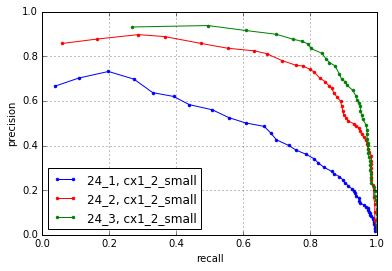

In [5]:
# compare flyem vs turagalab on validation set
fig, ax = plt.subplots()
ax.plot(cx1_2_small_29_results.rr, cx1_2_small_29_results.pp, 'b.-', label='24_1, cx1_2_small')
ax.plot(cx1_2_small_31_results.rr, cx1_2_small_31_results.pp, 'r.-', label='24_2, cx1_2_small')
ax.plot(cx1_2_small_32_results.rr, cx1_2_small_32_results.pp, 'g.-', label='24_3, cx1_2_small')
# ax.plot(cx1_2_results_flyem.rr, cx1_2_results_flyem.pp, 'k.-', label='flyem, cx_1_2')
legend = ax.legend(loc='lower left')
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.show()